In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file_path = 'C:/Users/20101/Desktop/Projects/wearable_tech_sleep_quality_extended.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,76.22,36.46,1.31,8.04,5.72,157.45,6.83,0.04,11.52
1,116.55,37.35,1.23,8.78,8.05,189.37,2.55,0.19,11.00
2,101.24,38.18,4.53,5.50,7.60,341.82,8.85,0.83,1.53
3,91.91,37.83,1.25,7.75,1.54,136.00,6.52,0.77,14.76
4,60.92,38.02,1.36,7.43,1.49,347.86,2.41,0.35,9.10


In [4]:
median_caffeine = data['Caffeine_Intake_mg'].median()

In [5]:
low_caffeine = data[data['Caffeine_Intake_mg'] < median_caffeine]
high_caffeine = data[data['Caffeine_Intake_mg'] >= median_caffeine]

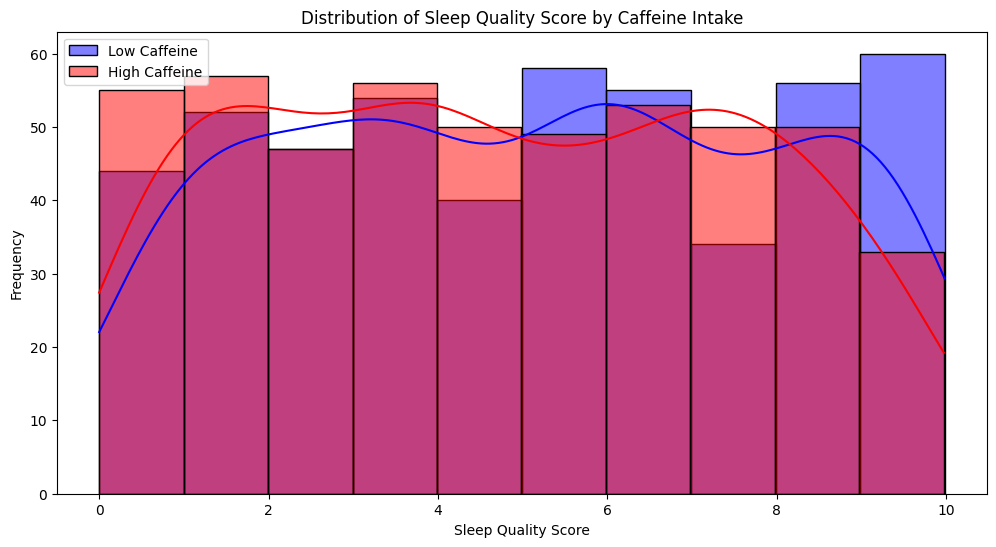

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(low_caffeine['Sleep_Quality_Score'], color='blue', label='Low Caffeine', kde=True)
sns.histplot(high_caffeine['Sleep_Quality_Score'], color='red', label='High Caffeine', kde=True)
plt.title('Distribution of Sleep Quality Score by Caffeine Intake')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
low_caffeine_stats = low_caffeine['Sleep_Quality_Score'].describe()
high_caffeine_stats = high_caffeine['Sleep_Quality_Score'].describe()

low_caffeine_stats, high_caffeine_stats

(count    500.000000
 mean       5.123500
 std        2.892088
 min        0.000000
 25%        2.662500
 50%        5.360000
 75%        7.625000
 max        9.980000
 Name: Sleep_Quality_Score, dtype: float64,
 count    500.000000
 mean       4.758420
 std        2.835088
 min        0.000000
 25%        2.270000
 50%        4.630000
 75%        7.210000
 max        9.970000
 Name: Sleep_Quality_Score, dtype: float64)

In [8]:
t_stat, p_value = stats.ttest_ind(low_caffeine['Sleep_Quality_Score'], high_caffeine['Sleep_Quality_Score'])

t_stat, p_value

(2.0157002523533145, 0.04409895649349083)

In [9]:
if p_value < 0.05:
    print("There is a statistically significant difference in sleep quality scores between low and high caffeine groups (p-value: {:.4f})".format(p_value))
else:
    print("There is no statistically significant difference in sleep quality scores between low and high caffeine groups (p-value: {:.4f})".format(p_value))

There is a statistically significant difference in sleep quality scores between low and high caffeine groups (p-value: 0.0441)
